In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt

In [27]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

In [4]:

from sklearn.metrics import mean_squared_error as mse

In [5]:
BTC_data_hours = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_hours.csv', parse_dates=True, index_col = 0)
BTC_data_days = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_days.csv', parse_dates=True, index_col = 0)
BTC_data_weeks = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_weeks.csv', parse_dates=True, index_col = 0)
BTC_data_months = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_months.csv', parse_dates=True, index_col = 0)

In [6]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)-1):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [7]:
def ts_train_test_split(series, start_walk):
    train, test = series[series.index < start_walk], series[series.index >= start_walk]
    return train, test

In [8]:
train, test = ts_train_test_split(BTC_data_days,BTC_data_days.index[-1*sum(BTC_data_days.index.year!=2020)])

In [9]:
raw_seq = train.values.reshape(-1)

In [10]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[95.3178781 21.602     19.048    ] 88.03728091999999
[21.602      19.048      88.03728092] 107.23326023
[ 19.048       88.03728092 107.23326023] 94.80182926
[ 88.03728092 107.23326023  94.80182926] 33.88274671
[107.23326023  94.80182926  33.88274671] 0.29585799
[94.80182926 33.88274671  0.29585799] 5.0
[33.88274671  0.29585799  5.        ] 66.86932290000004
[ 0.29585799  5.         66.8693229 ] 62.28998018
[ 5.         66.8693229  62.28998018] 105.35893402000004
[ 66.8693229   62.28998018 105.35893402] 82.30163181
[ 62.28998018 105.35893402  82.30163181] 48.97014484
[105.35893402  82.30163181  48.97014484] 16.836
[82.30163181 48.97014484 16.836     ] 16.699300700000002
[48.97014484 16.836      16.6993007 ] 12.64929577
[16.836      16.6993007  12.64929577] 80.51400824000002
[16.6993007  12.64929577 80.51400824] 133.44676911999994
[ 12.64929577  80.51400824 133.44676912] 246.71581895
[ 80.51400824 133.44676912 246.71581895] 95.82599863
[133.44676912 246.71581895  95.82599863] 81.41385241

In [11]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [13]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [14]:
x_input = test.values.reshape(-1)

In [15]:
test_X, test_y = split_sequence(x_input, n_steps)

In [16]:
test_X[0]

array([2127.29435418,  594.79395476, 1287.40625221])

In [17]:
yhat = model.predict(test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)), verbose=0)

In [18]:
val = {'pred':yhat.reshape(-1),'true':test_y}

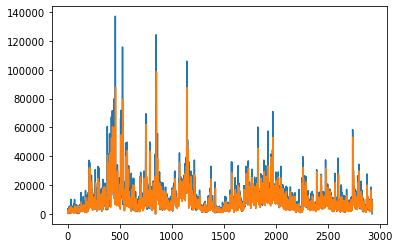

In [19]:
plt.plot(val['true'])
plt.plot(val['pred'])

In [20]:
round(mse(val['pred'], val['true'], squared=False), 3)

8784.201

In [21]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [22]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [23]:
yhat = model.predict(test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)), verbose=0)

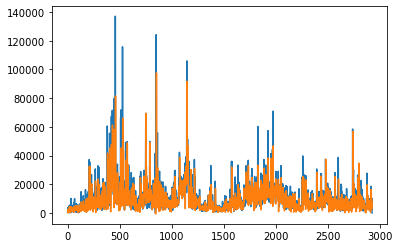

In [24]:
val = {'pred':yhat.reshape(-1),'true':test_y}
plt.plot(val['true'])
plt.plot(val['pred'])

In [25]:
round(mse(val['pred'], val['true'], squared=False), 3)

9244.981

In [28]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [30]:
yhat = model.predict(test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)), verbose=0)

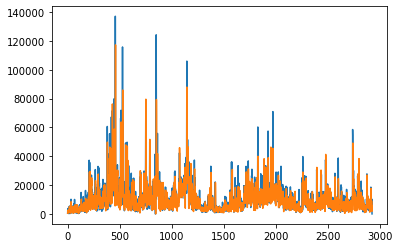

In [31]:
val = {'pred':yhat.reshape(-1),'true':test_y}
plt.plot(val['true'])
plt.plot(val['pred'])

In [ ]:
round(mse(val['pred'], val['true'], squared=False), 3)